In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Read data and remove the missing feature too much

In [3]:
path_data_train = 'D:\house-prices-advanced-regression-techniques\data/train.csv'
data_train = pd.read_csv(path_data_train)
data_train = data_train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
data_train = data_train.set_index('Id')

In [4]:
path_data_test = 'D:\house-prices-advanced-regression-techniques\data/test.csv'
data_test = pd.read_csv(path_data_test)
data_test = data_test.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
data_test = data_test.set_index('Id')

In [5]:
x_train = data_train.loc[:, data_train.columns != 'SalePrice']
y_train = data_train.loc[:, data_train.columns == 'SalePrice']
x_test = data_test

Concat 2 dataset

In [6]:
data = pd.concat([x_train, x_test], axis=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [7]:
def check_missing(df):
    for col in df:
        num_missing = df[col].isnull().sum()
        if num_missing > 0:
            print('Col: {}| Count: {}'.format(col, num_missing))

Split number fetures and fill missing by interpolate

In [8]:
data_num = data.select_dtypes(include='number')
column_names = list(data_num.columns)

In [9]:
from sklearn.preprocessing import MinMaxScaler
mm_scale = MinMaxScaler()
mm_scale.fit(data_num)
data_num_sacle = mm_scale.transform(data_num)
data_num_sacle = pd.DataFrame(data_num_sacle, columns=column_names)

data_num_sacle.head()

MinMaxScaler()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.368280,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.309140,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.408602,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.431452,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.561828,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [10]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=5, add_indicator=False)
knn.fit(data_num_sacle)
data_num_inter = knn.transform(data_num_sacle)
data_num_inter = pd.DataFrame(data_num_inter, columns=column_names)
data_num_inter

KNNImputer()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.368280,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.000000,0.090909,0.50
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.309140,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.363636,0.25
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.408602,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.000000,0.727273,0.50
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.431452,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.000000,0.090909,0.00
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.561828,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.823529,0.000000,0.002973,0.333333,0.750,0.710145,0.333333,0.00000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.454545,0.00
2915,0.823529,0.000000,0.002776,0.333333,0.500,0.710145,0.333333,0.00000,0.044649,0.0,...,0.192204,0.000000,0.032345,0.000000,0.0,0.0,0.0,0.000000,0.272727,0.00
2916,0.000000,0.476027,0.087406,0.444444,0.750,0.637681,0.766667,0.00000,0.216867,0.0,...,0.387097,0.332865,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.727273,0.00
2917,0.382353,0.140411,0.042726,0.444444,0.500,0.869565,0.700000,0.00000,0.059709,0.0,...,0.000000,0.056180,0.043127,0.000000,0.0,0.0,0.0,0.041176,0.545455,0.00


Split categorical features and fill missing

In [11]:
data_cate = data.select_dtypes(exclude='number')
column_names = list(data_cate.columns)

In [12]:
def process_missing_cate_data(data):
    for col in data:
        values = data[col].mode().values
        data[col] = data[col].fillna(values[0])
    check_missing(data)
    return data
    

In [13]:
data_cate_missing =  process_missing_cate_data(data_cate)

In [14]:
def create_onehot_encoder(df_cate):
    onehot_encoder = OneHotEncoder()
    for col in data_cate:
        data_cate[col] = data_cate[col].astype('category')
    onehot_encoder.fit(df_cate)
    return onehot_encoder

In [15]:
onehot_encoder = create_onehot_encoder(data_cate_missing)
onehot_data = pd.DataFrame(onehot_encoder.transform(data_cate_missing).toarray())

In [16]:
onehot_data
data_num_inter

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2915,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.368280,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.000000,0.090909,0.50
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.309140,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.363636,0.25
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.408602,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.000000,0.727273,0.50
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.431452,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.000000,0.090909,0.00
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.561828,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,0.823529,0.000000,0.002973,0.333333,0.750,0.710145,0.333333,0.00000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.454545,0.00
2915,0.823529,0.000000,0.002776,0.333333,0.500,0.710145,0.333333,0.00000,0.044649,0.0,...,0.192204,0.000000,0.032345,0.000000,0.0,0.0,0.0,0.000000,0.272727,0.00
2916,0.000000,0.476027,0.087406,0.444444,0.750,0.637681,0.766667,0.00000,0.216867,0.0,...,0.387097,0.332865,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.727273,0.00
2917,0.382353,0.140411,0.042726,0.444444,0.500,0.869565,0.700000,0.00000,0.059709,0.0,...,0.000000,0.056180,0.043127,0.000000,0.0,0.0,0.0,0.041176,0.545455,0.00


In [17]:
id_split = 1460

In [18]:
x_train_num = data_num_inter.iloc[data_num_inter.index < id_split]
x_test_num = data_num_inter.iloc[data_num_inter.index >= id_split]

In [19]:
x_train_cate = onehot_data.iloc[data_num_inter.index < id_split]
x_test_cate = onehot_data.iloc[data_num_inter.index >= id_split]

In [20]:
data_train_final = pd.concat([x_train_num, x_train_cate], axis=1)
data_train_final.index +=1
data_train_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,229,230,231,232,233,234,235,236,237,238
1,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.106815,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1459,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.674312,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
data_test_final = pd.concat([x_test_num, x_test_cate], axis=1)
data_test_final.index+=1
data_test_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,229,230,231,232,233,234,235,236,237,238
1461,0.000000,0.202055,0.048246,0.444444,0.625,0.644928,0.183333,0.00000,0.082920,0.094364,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1462,0.000000,0.205479,0.060609,0.555556,0.625,0.623188,0.133333,0.06750,0.163536,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1463,0.235294,0.181507,0.058566,0.444444,0.500,0.905797,0.800000,0.00000,0.140149,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1464,0.235294,0.195205,0.040562,0.555556,0.625,0.913043,0.800000,0.01250,0.106662,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1465,0.588235,0.075342,0.017318,0.777778,0.500,0.869565,0.700000,0.00000,0.046598,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.823529,0.000000,0.002973,0.333333,0.750,0.710145,0.333333,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2916,0.823529,0.000000,0.002776,0.333333,0.500,0.710145,0.333333,0.00000,0.044649,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,0.000000,0.476027,0.087406,0.444444,0.750,0.637681,0.766667,0.00000,0.216867,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2918,0.382353,0.140411,0.042726,0.444444,0.500,0.869565,0.700000,0.00000,0.059709,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# import numpy as np
# import pandas as pd
# from sklearn import preprocessing
# import xgboost as xgb
# from xgboost.sklearn import XGBRegressor
# import datetime
# from sklearn.model_selection import GridSearchCV
# xgb1 = XGBRegressor()
# parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [3,4,5, 6],
#               'min_child_weight': [3,4,5],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}

# xgb_grid = GridSearchCV(xgb1,
#                         parameters,
#                         cv = 5,
#                         n_jobs = 5,
#                         verbose=True)

# xgb_grid.fit(x_train_cate,y_train)
# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

In [23]:
# model =  xgb_grid.best_estimator_
# y_predict_test = xgb_grid.best_estimator_.predict(x_test_cate)
# print(y_predict_test.shape)

In [24]:
# res = zip(list(np.arange(1461, 5000)), list(int(i) for i in y_predict_test))
# df = pd.DataFrame(res, columns=['Id', 'SalePrice'])
# df.to_csv('res.csv', index=None)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

<All keys matched successfully>

MSE: 887678208.00
RMSE: 29793.93


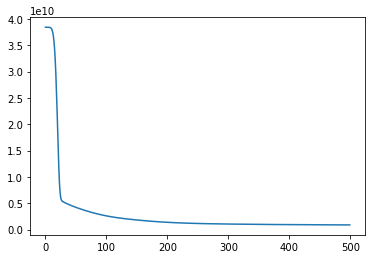

In [25]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Read data
data = fetch_california_housing()
X, y = data_train_final.to_numpy(), y_train.to_numpy()

# train-test split for model evaluation
X_train_raw, X_val_raw, y_train_raw, y_val = train_test_split(X, y, train_size=0.7, shuffle=True)

# Convert to 2D PyTorch tensors
X_train_raw = torch.tensor(X_train_raw, dtype=torch.float32)
y_train_raw = torch.tensor(y_train_raw, dtype=torch.float32).reshape(-1, 1)
X_val = torch.tensor(X_val_raw, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1)

# Define the model
model = nn.Sequential(
    nn.Linear(275, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
)

# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epochs = 500   # number of epochs to run
batch_size = 16  # size of each batch
batch_start = torch.arange(0, len(X_train_raw), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train_raw[start:start+batch_size]
            y_batch = y_train_raw[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_val)
    mse = loss_fn(y_pred, y_val)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [35]:
data_test_final_ = data_test_final.to_numpy()
model.eval()
res = []
with torch.no_grad():
    # Test out inference with 5 samples
    for i in range(1459):
        X_sample = data_test_final_[i: i+1]
        X_sample = torch.tensor(X_sample, dtype=torch.float32)
        y_pred = model(X_sample)
        res.append(round(y_pred.numpy()[0][0]))

print(res)

Sequential(
  (0): Linear(in_features=275, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=8, bias=True)
  (9): ReLU()
  (10): Linear(in_features=8, out_features=4, bias=True)
  (11): ReLU()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

[109568.0, 150057.0, 180064.0, 183374.0, 172817.0, 163295.0, 147980.0, 151147.0, 181906.0, 129083.0, 152355.0, 98843.0, 96028.0, 148489.0, 94674.0, 361982.0, 241192.0, 328062.0, 331572.0, 438021.0, 312460.0, 215456.0, 158639.0, 170688.0, 190230.0, 189098.0, 353908.0, 202998.0, 197137.0, 249446.0, 203199.0, 87390.0, 201336.0, 280991.0, 271575.0, 242824.0, 157485.0, 183373.0, 178389.0, 170881.0, 188077.0, 155131.0, 287451.0, 243219.0, 211830.0, 176721.0, 238101.0, 193072.0, 156606.0, 150375.0, 149815.0, 156406.0, 113444.0, 140572.0, 166460.0, 159102.0, 159477.0, 109076.0, 201240.0, 132788.0, 129778.0, 177184.0, 113253.0, 90318.0, 116441.0, 101921.0, 97228.0, 120788.0, 154545.0, 217775.0, 162519.0, 109216.0, 138462.0, 113540.0, 146605.0, 116358.0, 69311.0, 165681.0, 175433.0, 109884.0, 137134.0, 126999.0, 162980.0, 73662.0, 119846.0, 139056.0, 150394.0, 126245.0, 123891.0, 130519.0, 110968.0, 161040.0, 162619.0, 117460.0, 138475.0, 97262.0, 97631.0, 101103.0, 98241.0, 133444.0, 123471.0, 

In [ ]:
df_res = zip(list(np.arange(1461, 5000)), res)
df = pd.DataFrame(df_res, columns=['Id', 'SalePrice'])
df.to_csv('res.csv', index=None)